# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010] # games from 2010
nba_2014 = nba[nba.year_id == 2014] # games from 2014

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
knicks_pts = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts = nba_2010[nba_2010.fran_id == 'Nets']['pts']

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. 


In [6]:
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
diff_means_2010

9.731707317073173

Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. 


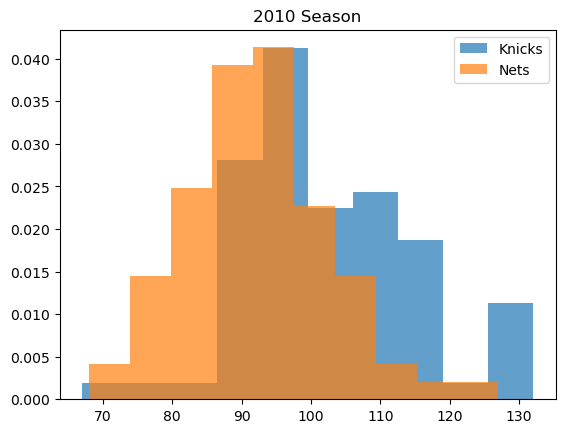

In [14]:
plt.hist(knicks_pts, alpha = .7, density = True, label = 'Knicks')
plt.hist(nets_pts, alpha = .7, density = True, label = 'Nets')
plt.legend()
plt.title("2010 Season")
plt.show()

For the '2014 Season':


In [15]:
knicks_pts_2014 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_2014 = nba_2014[nba_2014.fran_id == 'Nets']['pts']

In [16]:
diff_means_2014 = knicks_pts_2014.mean() - nets_pts_2014.mean()
diff_means_2014

0.44706798131809933

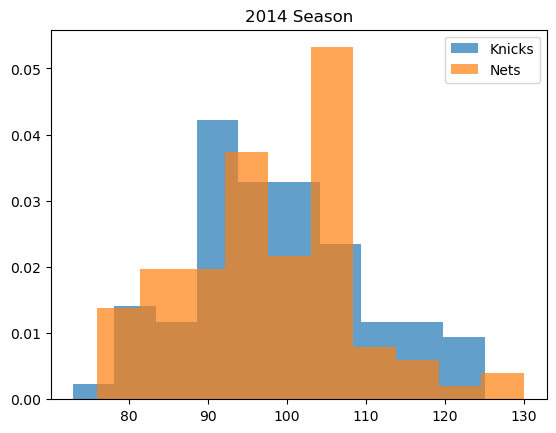

In [17]:
plt.hist(knicks_pts_2014, alpha = .7, density = True, label = 'Knicks')
plt.hist(nets_pts_2014, alpha = .7, density = True, label = 'Nets')
plt.legend()
plt.title("2014 Season")
plt.show()

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. 


c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


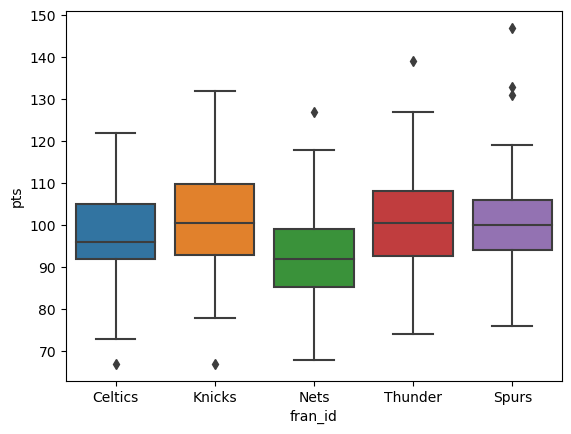

In [18]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

To determine if categorical variables are associated; calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result.


In [20]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq 

game_location,A,H
game_result,,
L,133,105
W,92,120


Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [21]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


Using the contingency table created, calculate the expected contingency table (if there were no association) and the Chi-Square statistic.


In [22]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association.*

*The more that the expected and observed tables differ, the more sure we can be that the variables are associated.*

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. 


In [23]:
point_difference_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
point_difference_cov

array([[186.56,   1.37],
       [  1.37,   0.05]])

*Covariance: 1.37*

*'point_diff' has a high variance (186.56), meaning it varies significantly from its mean.*

*'forecast' has a very low variance (0.05), meaning it is quite stable around its mean.*

*The covariance between 'point_diff' and 'forecast' is small but positive (1.37), indicating a slight positive relationship between the two variables, though it's not particularly strong.*

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. 


In [24]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)

*There is a moderate positive correlation (r ≈ 0.44) between the two variables.*

*The correlation is highly statistically significant (p-value ≈ 0), meaning the likelihood of observing this correlation by chance is extremely low.*

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Using `plt.clf()` so that the plots don't layer on top of one another.

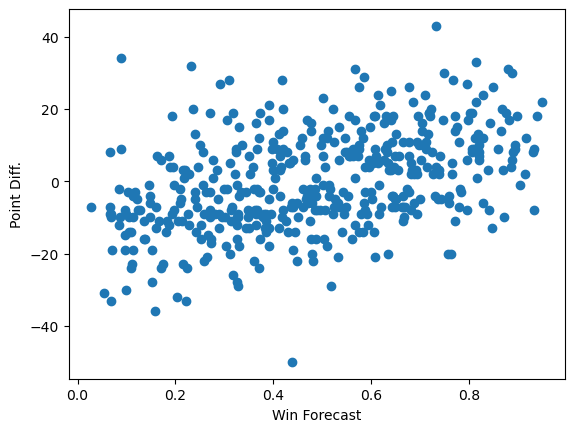

In [25]:
plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Win Forecast')
plt.ylabel('Point Diff.')
plt.show()

*Given the scatter plot and the Pearson correlation result (r ≈ 0.44), this visualization aligns with **a moderate positive correlation**.*

*As the Win Forecast increases, there is a general tendency for Point Diff to also increase, but the scatter of points suggests there is some variability in the outcome.*